# Eigenfaces a

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from numpy.linalg import matrix_rank
from numpy.linalg import inv

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'face.mat'

In [2]:
# Split data set
# Train_id is the index of each train data in the total data set, test_id the same

from sklearn.model_selection import train_test_split

indices = np.arange(len(face_id[0]))
train_data, test_data, train_id, test_id = train_test_split(face_data.T, indices, test_size = 0.1)
train_data = train_data.T
test_data = test_data.T

print(train_data)
print(train_data.shape)
print(test_data)
print(test_data.shape)

[[102  96  73 ... 164  65  57]
 [103  90  83 ... 162  64  55]
 [104 105 124 ... 163  65  55]
 ...
 [114 171  33 ...  35 230 171]
 [ 84 203  30 ...  41 229 175]
 [ 62 122  26 ...  46 232 176]]
(2576, 468)
[[146 143 173 ... 207  27  66]
 [158 147 158 ... 186  29  58]
 [152 150 163 ... 148  30  94]
 ...
 [ 85  33  33 ...  39  80  56]
 [ 83  29  36 ...  55 127  50]
 [ 84  26  37 ...  32 181  46]]
(2576, 52)


In [3]:
# Count the number of face images for each person 
# in the train and test set after randomly split

train_label = face_id[0,train_id]
unique_train, counts_train = np.unique(train_label, return_counts=True)
dict(zip(unique_train, counts_train))

#test_label = face_id[0,test_id]
#unique_test, counts_test = np.unique(test_label, return_counts=True)
#dict(zip(unique_test, counts_test))

#print(unique_train)
#print(train_label)
#print(counts_train)


{1: 9,
 2: 7,
 3: 10,
 4: 9,
 5: 8,
 6: 9,
 7: 10,
 8: 9,
 9: 9,
 10: 9,
 11: 8,
 12: 8,
 13: 10,
 14: 9,
 15: 9,
 16: 8,
 17: 10,
 18: 9,
 19: 9,
 20: 9,
 21: 9,
 22: 10,
 23: 8,
 24: 10,
 25: 10,
 26: 9,
 27: 9,
 28: 10,
 29: 9,
 30: 10,
 31: 5,
 32: 9,
 33: 10,
 34: 9,
 35: 10,
 36: 10,
 37: 8,
 38: 10,
 39: 9,
 40: 9,
 41: 8,
 42: 9,
 43: 9,
 44: 8,
 45: 10,
 46: 10,
 47: 10,
 48: 8,
 49: 10,
 50: 9,
 51: 9,
 52: 7}

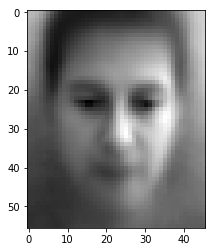

In [4]:
# Compute average face vector

num_train = len(train_data[0])

avg_face = train_data.mean(axis=1)

plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')

#print(train_data.shape)
#print(num_train)

In [5]:
# Compute covariance matrix without low-dimensional compution

num_pix = len(train_data)

A = train_data - avg_face.reshape(num_pix,1)
S = (A.dot(A.T)) / num_train

#print(num_pix)

In [6]:
# Compute the egenvalues
# Due to numerical error, some eigenvalues are complex but they have
# negligible imaginary parts. Morover real symetric covariance 
# matrix always has real eigenvalues and eigenvectors.

eigvals, eigvecs = np.linalg.eig(S)
eigvals = eigvals.real
eigvecs = eigvecs.real

In [7]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals.shape)
print(eigvecs.shape)

nonzero_eigvals = eigvals[abs(eigvals) >= 1e-7]
print(nonzero_eigvals.shape)

eigvecs_nonzero_eigvals = eigvecs[:,abs(eigvals) >= 1e-7]
print(eigvecs_nonzero_eigvals.shape)

(2576,)
(2576, 2576)
(467,)
(2576, 467)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(2576, 30)


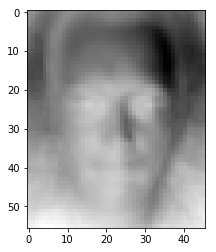

In [8]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces

M = 30 # Number of eigenvectors with M largest eigenvalues to be used

sorted_index = np.argsort(-nonzero_eigvals)[:M]
print(sorted_index)

eigfaces = eigvecs_nonzero_eigvals[:,sorted_index]
print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# Eigenfaces b

In [9]:
# Compute covariance matrix with low-dimensional compution

S_low_dim = ((A.T).dot(A)) / num_train

print(matrix_rank(A))
print(S.shape)
print(S_low_dim.shape)

467
(2576, 2576)
(468, 468)


In [10]:
# Compute the egenvalues 

eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
eigvals_low_dim = eigvals_low_dim.real
eigvecs_low_dim = eigvecs_low_dim.real

In [11]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals_low_dim.shape)
print(eigvecs_low_dim.shape)

nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
print(nonzero_eigvals_low_dim.shape)

eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
print(eigvecs_nonzero_eigvals_low_dim.shape)

(468,)
(468, 468)
(467,)
(468, 467)


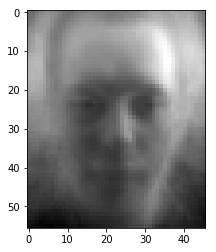

In [12]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces and 
# convert them to the eigenvectors of S and normalize them

eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M]])

eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T

#print(eigfaces_low_dim[:,0])
#print(eigfaces[:,0])
#print(eigfaces_low_dim.shape)

plt.imshow(np.reshape(eigfaces_low_dim[:,0],(46,56)).T, cmap = 'gist_gray')

# PCA-LAD

In [13]:
sorted_train_data = train_data[:,np.argsort(train_label)]
sorted_train_label = train_label[np.argsort(train_label)]

In [14]:
# Compute class mean M, the class mean for the i-th class is the 
# i-th column vector of M 

c = len(counts_train) # number of classes
M = np.zeros((num_pix, c))

list_Sw = [] # Each element of list_Sw contains the with-in scatter matrix of the i+1th class

current_index = 0;
for idx,cnt in enumerate(counts_train):
    X = sorted_train_data[:,current_index : current_index + cnt]
    M[:,idx] = (X.mean(axis=1))
    A_Sw =  X - M[:,idx].reshape(num_pix,1)
    Sw = A_Sw.dot(A_Sw.T)
    list_Sw.append(Sw)
    current_index += cnt

In [15]:
# Compute between-scatter matrix Sb

A_Sb =  M - avg_face.reshape(num_pix,1)
Sb = A_Sb.dot(A_Sb.T)
print(matrix_rank(Sb))
print(c-1)

51
51


In [16]:
# Compute within-scatter matrix Sw
N = num_train
Sw = np.zeros((num_pix,num_pix))

for i in range(c):
    Sw += list_Sw[i]
    
print(matrix_rank(Sw))
print(N-c)

416
416


In [17]:
# PCA to reduce dimenstion to Mpca

M_pca= 200
    
W_pca_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_pca]]) 
W_pca = (preprocessing.normalize(W_pca_unnormalized.T, norm='l2')).T

In [18]:
# Project Sw and Sb to PCA reduced subspace
Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))

#print(Sw_pca.shape)

In [19]:
# Perform LDA on the reduced subspace

eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
eigvals_lda = eigvals_lda.real
eigvecs_lda = eigvecs_lda.real

print(matrix_rank((inv(Sw_pca)).dot(Sb_pca)))
print(eigvals_lda.shape)
print(eigvecs_lda.shape)

nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
print(nonzero_eigvals_lda.shape)

eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
print(eigvecs_nonzero_eigvals_lda.shape)

M_lda = 50

sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]
#print(sorted_index_lda)

W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
print(W_lda.shape)


51
(200,)
(200, 200)
(51,)
(200, 51)
(200, 50)


In [20]:
# NN-classification

# Project train faces onto LDA subspace
W_train_pca = (A.T).dot(W_pca)
W_train_lda = (W_train_pca).dot(W_lda)

A_test_lda = test_data - avg_face.reshape(num_pix,1)

# Project test data to PCA subspace
W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace

# Project test data to LDA subspace
W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace

print(W_test_pca.shape)
print(W_test_lda.shape)

test_results_lda = []
for row in W_test_lda:
    index = np.argmin(np.linalg.norm(row - W_train_lda, axis=1))
    test_results_lda.append(face_id[0,train_id[index]])
    
true_results = face_id[0,test_id]

print(true_results)
print(test_results_lda)



(52, 200)
(52, 50)
[31 32 41 41 31 20 11 37  2 21 52 37 39 42 52 48  5 48 43 23 27  5 50 31
  1  6  2 40 14 12 29 18  2 15 44 11 51 44 31 12  8 10 34 19 26 23 16 16
  9  4 52 31]
[31, 32, 41, 41, 31, 20, 11, 37, 8, 21, 38, 37, 39, 42, 52, 48, 5, 48, 43, 23, 19, 5, 50, 31, 38, 6, 2, 40, 14, 12, 38, 18, 2, 15, 38, 11, 51, 44, 31, 12, 8, 10, 6, 21, 20, 29, 16, 1, 9, 4, 52, 31]


0.7884615384615384
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


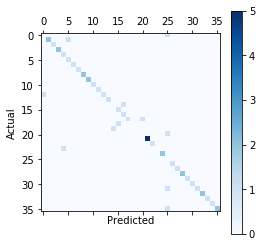

In [21]:
results_error_lda = test_results_lda - true_results

success_rate = np.count_nonzero(results_error_lda == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results_lda)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

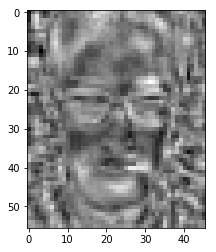

In [22]:
# Generate fisherfaces by converting Wlda back to its original data space

fisherfaces = W_pca.dot(W_lda) # Columns are fisherfaces

plt.imshow(np.reshape(fisherfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# PCA-LDA Ensemble 

In [23]:
sorted_train_data = train_data[:,np.argsort(train_label)]
sorted_train_label = train_label[np.argsort(train_label)]

In [24]:
import random

T = 50
M0 = 10
M1 = 90
# Mpca = M0 + M1 should not exceed 
M_lda = 50
n_sample = 7 # number of samples per class

# Generate random subspaces 
def rand_subspace(eigvecs,eigvals):
    subspace = eigvecs[:,np.argsort(-eigvals)[ : M0]]
    #print(len(eigvals))
    index = (np.argsort(eigvals)[ : len(eigvals) - M0]).tolist()
    rand_index = random.sample(index, M1)  
    subspace = np.concatenate((subspace, eigvecs[:,rand_index]), axis=1)
    return subspace

# Bagging (from every class)
def rand_sample(sorted_train_data,sorted_train_label,counts_train):
    sample = list()
    label = list()
    current_index = 0
    for idx,cnt in enumerate(counts_train):
        for j in range(n_sample):
            index = random.randrange(current_index, current_index + cnt, 1)
            sample.append(sorted_train_data[:,index])
            label.append(sorted_train_label[index])
        current_index += cnt
    
    return ((np.asarray(sample)).T), np.asarray(label)

# Generate eigenspace of data set using PCA
def eigspace_generator_ensemble(data):
    num_train = len(data[0])
    avg_face = data.mean(axis=1)
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:]]) 
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    return eigfaces_low_dim, nonzero_eigvals_low_dim


In [25]:
def lda_rand_subspace(W_pca,test_data): # test_data single column vector
    
    Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
    Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))
    
    eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
    eigvals_lda = eigvals_lda.real
    eigvecs_lda = eigvecs_lda.real

    nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
    eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
    
    sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]

    W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
    
    # NN-classification

    W_train_pca = (A.T).dot(W_pca)
    W_train_lda = (W_train_pca).dot(W_lda)
    sorted_W_train_lda = W_train_lda[np.argsort(train_label),:]

    A_test_lda = test_data.reshape(num_pix,1) - avg_face.reshape(num_pix,1)

    # Project test data to PCA subspace
    W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace
    # Project test data to LDA subspace
    W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace
    
    distance = np.linalg.norm(W_test_lda - sorted_W_train_lda, axis=1) # row vector containing Euclidiean distance to each tranining data
   
        
    min_distance = []
    current_index = 0;
    for idx,cnt in enumerate(counts_train):
        distance = distance.reshape(len(distance),1)
        distance[current_index : current_index + cnt,:]
        min_distance.append(min(distance[current_index : current_index + cnt,:]))
        current_index += cnt
    
    post_distribution = (min_distance / sum(min_distance)) 
    
    return post_distribution

# Committe machine with randomized feature space

In [26]:
R = [] 
for i in range(T):
    R.append(rand_subspace(eigvecs_nonzero_eigvals,nonzero_eigvals)) # generate T random subspaces

In [29]:
# average

avg_error = []
test_results_ensemble = []

for i in range(len(test_data[0])):
    NN_class = []
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_rand_subspace(R[j],test_data[:,i])) # perform lda on each subspaces learnt
        NN_class.append(np.argmin(post_distribution[j]) + 1)
        
    index = np.argmin(sum(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    avg_error.append(np.count_nonzero(NN_class -  true_results[i] != 0) / len(NN_class))
    print(test_results_ensemble)

[46]
[46, 32]
[46, 32, 41]
[46, 32, 41, 41]
[46, 32, 41, 41, 31]
[46, 32, 41, 41, 31, 20]
[46, 32, 41, 41, 31, 20, 11]
[46, 32, 41, 41, 31, 20, 11, 37]
[46, 32, 41, 41, 31, 20, 11, 37, 18]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48, 5]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48, 5, 48]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48, 5, 48, 43]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48, 5, 48, 43, 23]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52, 48, 5, 48, 43, 23, 48]
[46, 32, 41, 41, 31, 20, 11, 37, 18, 21, 52, 37, 39, 42, 52,

In [33]:
results_error = test_results_ensemble - true_results

error_rate = np.count_nonzero(results_error != 0) / len(results_error)
success_rate = np.count_nonzero(results_error == 0) / len(results_error)
print(error_rate)
print(np.mean(avg_error))
print(success_rate)

0.15384615384615385
0.43461538461538457
0.8461538461538461


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ()
for i in range(52):
    objects += (i+1,)
y_pos = np.arange(len(objects))
performance = post_distribution[0].reshape(52,)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Class index (class label -1)')
plt.ylabel('Probability')
plt.title('Posterior distribution')
 
plt.show()

In [ ]:
def product(l):
    p = 1
    for i in l:
        p = p*i
    return p

# product

test_results_ensemble = []
for i in range(1):
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_rand_subspace(R[j],test_data[:,i])) # perform lda on each subspaces learnt

    index = np.argmin(product(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    print(test_results_ensemble)

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ()
for i in range(52):
    objects += (i+1,)
y_pos = np.arange(len(objects))
performance = ((product(post_distribution) / T).reshape(52,))*1e16
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Class index (class label -1)')
plt.ylabel('Probability')
plt.title('Posterior distribution')
 
plt.show()